## The Dataset
  
This MNIST dataset contains a lot of examples:

* The MNIST training set contains 60,000 examples.
* The MNIST test set contains 10,000 examples.

Each example contains a pixel map showing how a person wrote a digit. For example, the following images shows how a person wrote the digit `1` and how that digit might be represented in a 14x14 pixel map (after the input data is normalized). 

![Two images. The first image shows a somewhat fuzzy digit one. The second image shows a 14x14 floating-point array in which most of the cells contain 0 but a few cells contain values between 0.0 and 1.0. The pattern of nonzero values corresponds to the image of the fuzzy digit in the first image.](https://www.tensorflow.org/images/MNIST-Matrix.png)

Each example in the MNIST dataset consists of:

* A label specified by a [rater](https://developers.google.com/machine-learning/glossary/#rater).  Each label must be an integer from 0 to 9.  For example, in the preceding image, the rater would almost certainly assign the label `1` to the example.
* A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.  

This is a multi-class classification problem with 10 output classes, one for each digit.

In [ ]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

print("tf version ",tf.__version__)

tf version  2.4.0


In [ ]:
# Google colab Kaggle integration
!pip install kaggle

In [ ]:
!ls -al
!mkdir .kaggle


total 20
drwxr-xr-x 1 root root 4096 Jan  1 17:07 .
drwxr-xr-x 1 root root 4096 Jan  1 16:58 ..
drwxr-xr-x 1 root root 4096 Dec 21 17:29 .config
drwxr-xr-x 2 root root 4096 Jan  1 17:07 .kaggle
drwxr-xr-x 1 root root 4096 Dec 21 17:29 sample_data
mkdir: cannot create directory ‘.kaggle’: File exists


In [ ]:
import json
token = {'username':'matucker','key':'6cc01e29e4aac2d8f2a68956b5944bd0'}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!ls -al .kaggle
!kaggle config set -n path -v{/content}
!kaggle datasets list

total 12
drwxr-xr-x 2 root root 4096 Jan  1 17:07 .
drwxr-xr-x 1 root root 4096 Jan  1 17:07 ..
-rw-r--r-- 1 root root   67 Jan  1 17:07 kaggle.json
- path is now set to: {/content}
ref                                                            title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
arashnic/hr-analytics-job-change-of-data-scientists            HR Analytics: Job Change of Data Scientists        295KB  2020-12-07 00:25:10           2026  
utkarshxy/who-worldhealth-statistics-2020-complete             World Health 2020 🌏 | For Geospatial Analysis        1MB  2021-01-01 15:16:17             76  
babyoda/access-to-computers-from-home-oecd                     Access to Computers From Home OECD                   3KB  2020-12-04 10:50:09            191  
shashwatwork/impact-of-covid

In [ ]:
!kaggle datasets list -s sign

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
datamunge/sign-language-mnist                                 Sign Language MNIST                                  63MB  2017-10-20 15:09:18          35038  
ardamavi/sign-language-digits-dataset                         Sign Language Digits Dataset                         17MB  2017-12-24 16:08:56          15583  
valentynsichkar/traffic-signs-preprocessed                    Traffic Signs Preprocessed                            4GB  2019-08-31 18:22:11           4529  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                GTSRB - German Traffic Sign Recognition Benchmark   612MB  2018-11-25 18:12:34          22049  
usgs/earthquake-database                            

In [ ]:
!kaggle datasets download -d datamunge/sign-language-mnist -p /content

 78% 49.0M/62.6M [00:02<00:01, 12.2MB/s]
100% 62.6M/62.6M [00:02<00:00, 23.3MB/s]


In [ ]:
!unzip \*.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
!ls -al
!pwd
!ls -al sign_mnist_train
!ls -al sign_mnist_test

total 167456
drwxr-xr-x 1 root root     4096 Jan  1 17:09 .
drwxr-xr-x 1 root root     4096 Jan  1 16:58 ..
-rw-r--r-- 1 root root   208007 Sep 21  2019 american_sign_language.PNG
-rw-r--r-- 1 root root   487452 Sep 21  2019 amer_sign2.png
-rw-r--r-- 1 root root    44527 Sep 21  2019 amer_sign3.png
drwxr-xr-x 1 root root     4096 Dec 21 17:29 .config
drwxr-xr-x 2 root root     4096 Jan  1 17:07 .kaggle
drwxr-xr-x 1 root root     4096 Dec 21 17:29 sample_data
-rw-r--r-- 1 root root 65633206 Jan  1 17:09 sign-language-mnist.zip
drwxr-xr-x 2 root root     4096 Jan  1 17:09 sign_mnist_test
-rw-r--r-- 1 root root 21777485 Sep 21  2019 sign_mnist_test.csv
drwxr-xr-x 2 root root     4096 Jan  1 17:09 sign_mnist_train
-rw-r--r-- 1 root root 83281065 Sep 21  2019 sign_mnist_train.csv
/content
total 81340
drwxr-xr-x 2 root root     4096 Jan  1 17:09 .
drwxr-xr-x 1 root root     4096 Jan  1 17:09 ..
-rw-r--r-- 1 root root 83281065 Sep 21  2019 sign_mnist_train.csv
total 21276
drwxr-xr-x 2 root ro

In [ ]:
import pandas as pd
pd_train = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
pd_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
y_train = pd_train[["label"]].to_numpy()

In [ ]:
print(y_train)

<bound method DataFrame.to_numpy of        label
0          3
1          6
2          2
3          2
4         13
...      ...
27450     13
27451     23
27452     18
27453     17
27454     23

[27455 rows x 1 columns]>


In [ ]:
x_train = pd_train[pd_train.columns[1:]].to_numpy()
print(x_train)

[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]


In [ ]:
pd_test = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')
print(pd_test.head())
y_test = pd_test[["label"]].to_numpy()
print(y_test)
x_test = pd_test[pd_test.columns[1:]].to_numpy()
print(x_test)

   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      6     149     149     150  ...       106       112       120       107
1      5     126     128     131  ...       184       184       182       180
2     10      85      88      92  ...       226       225       224       222
3      0     203     205     207  ...       230       240       253       255
4      3     188     191     193  ...        49        46        46        53

[5 rows x 785 columns]
[[ 6]
 [ 5]
 [10]
 ...
 [ 2]
 [ 4]
 [ 2]]
[[149 149 150 ... 112 120 107]
 [126 128 131 ... 184 182 180]
 [ 85  88  92 ... 225 224 222]
 ...
 [190 191 190 ... 211 209 208]
 [201 205 208 ...  67  70  63]
 [173 174 173 ... 195 193 192]]


## Load the dataset

`tf.keras` provides a set of convenience functions for loading well-known datasets. Each of these convenience functions does the following:

* Loads both the training set and the test set.
* Separates each set into features and labels.

The relevant convenience function for MNIST is called `mnist.load_data()`:

In [ ]:
  # def load_data()
  # # origin_folder = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/'
  # # path = get_file(
  # #     path,
  # #     origin=origin_folder + 'mnist.npz',
  # #     file_hash=
  # #     '731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1')
  # path = 'sign_mnist_train/sign_mnist_train.csv'
  # with np.load(path, allow_pickle=True) as f:
  #   x_train, y_train = f['x_train'], f['y_train']
  #   x_test, y_test = f['x_test'], f['y_test']

  #   return (x_train, y_train), (x_test, y_test)

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train.size", x_train.size)
print("x_train.itemsize", x_train.itemsize)
print("x_train.shape", x_train.shape)
print("x_test.shape", x_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

x_train.size 47040000
x_train.itemsize 1
x_train.shape (60000, 28, 28)
x_test.shape (10000, 28, 28)
y_train.shape (60000,)
y_test.shape (10000,)


In [ ]:
print("x_train.size", x_train.size)
print("x_train.itemsize", x_train.itemsize)
print("x_train.shape", x_train.shape)
print("x_test.shape", x_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

x_train.size 21524720
x_train.itemsize 8
x_train.shape (27455, 784)
x_test.shape (7172, 784)
y_train.shape (27455, 1)
y_test.shape (7172, 1)


Notice that `mnist.load_data()` returned four separate values:

* `x_train` contains the training set's features.
* `y_train` contains the training set's labels.
* `x_test` contains the test set's features.
* `y_test` contains the test set's labels.

**Note:** The MNIST .csv training set is already shuffled.

## View the dataset

The .csv file for the California Housing Dataset contains column names (for example, `latitude`, `longitude`, `population`). By contrast, the .csv file for MNIST does not contain column names. Instead of column names, you use ordinal numbers to access different subsets of the MNIST dataset. In fact, it is probably best to think of `x_train` and `x_test` as three-dimensional NumPy arrays:  



In [ ]:
# Output example #2917 of the training set.
x_train[2917]

array([168, 173, 178, 182, 184, 188, 192, 194, 197, 199, 201, 203, 206, 208, 208, 208, 209, 209, 209, 210, 210, 210, 212, 212, 213, 213, 213, 213, 172, 176, 181, 185, 191, 185, 188, 199, 199, 203,
       206, 206, 208, 210, 211, 212, 213, 212, 213, 214, 214, 214, 215, 215, 215, 215, 214, 215, 174, 180, 185, 184, 198, 179, 141, 202, 204, 207, 208, 209, 211, 213, 214, 215, 215, 216, 217, 216,
       216, 217, 218, 219, 219, 219, 218, 219, 178, 184, 190, 186, 209, 194, 114, 190, 210, 208, 211, 213, 215, 216, 216, 218, 218, 218, 219, 219, 218, 220, 221, 221, 221, 222, 221, 221, 182, 186,
       191, 189, 216, 206, 108, 175, 217, 210, 215, 215, 217, 217, 218, 221, 221, 222, 222, 224, 226, 222, 223, 223, 222, 224, 223, 223, 182, 187, 191, 191, 212, 212, 110, 165, 221, 212, 216, 218,
       222, 223, 222, 223, 227, 230, 225, 218, 214, 229, 225, 227, 227, 227, 226, 227, 184, 190, 194, 194, 210, 218, 122, 154, 226, 215, 217, 219, 212, 217, 229, 220, 188, 204, 239, 209, 155, 177,
       236, 227

Alternatively, you can call `matplotlib.pyplot.imshow` to interpret the preceding numeric array as an image. 

TypeError: ignored

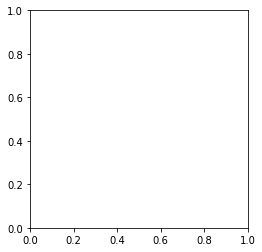

In [ ]:
# Use false colors to visualize the array.
plt.imshow(x_train[2917])

In [ ]:
# Output row #10 of example #2917.
x_train[2917][10]

In [ ]:
# Output pixel #16 of row #10 of example #2900.
x_train[2917][10][16]

## Task 1: Normalize feature values

Complete the following code cell to map each feature value from its current representation (an integer between 0 and 255) to a floating-point value between 0 and 1.0. Store the floating-point values in `x_train_normalized` and `x_test_normalized`.

In [ ]:
x_train_normalized = x_train/255.0
x_test_normalized = x_test/255.0 
print(x_train_normalized[2900][10]) # Output a normalized row

0.5725490196078431


In [ ]:
#@title Double-click to see a solution to Task 1. 

x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2900][12]) # Output a normalized row

## Define a plotting function

The following function plots an accuracy curve:

In [ ]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


## Create a deep neural net model

The `create_model` function defines the topography of the deep neural net, specifying the following:

* The number of [layers](https://developers.google.com/machine-learning/glossary/#layer) in the deep neural net.
* The number of [nodes](https://developers.google.com/machine-learning/glossary/#node) in each layer.
* Any [regularization](https://developers.google.com/machine-learning/glossary/#regularization) layers.

The `create_model` function also defines the [activation function](https://developers.google.com/machine-learning/glossary/#activation_function) of each layer.  The activation function of the output layer is [softmax](https://developers.google.com/machine-learning/glossary/#softmax), which will yield 10 different outputs for each example. Each of the 10 outputs provides the probability that the input example is a certain digit.

**Note:** Unlike several of the recent Colabs, this exercise does not define feature columns or a feature layer.  Instead, the model will train on the NumPy array.

In [ ]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  #node_count = 32  # 96%
  #node_count = 64   # 97%
  #node_count = 128   # 97.97%
  node_count = 256   # 98.34%
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
  # MAT-> already flattened
  #model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.   95%
  model.add(tf.keras.layers.Dense(units=node_count, activation='relu'))
  
  # Define a dropout regularization layer. 
  #model.add(tf.keras.layers.Dropout(rate=0.2))
  #model.add(tf.keras.layers.Dropout(rate=0.02)) #97.50%
  model.add(tf.keras.layers.Dropout(rate=0.4)) #97.82%
  #model.add(tf.keras.layers.Dropout(rate=0.8)) #95.5%

  # 2nd hidden layer.   
  model.add(tf.keras.layers.Dense(units=node_count, activation='relu'))

  # 3rd hidden layer.   96%
  model.add(tf.keras.layers.Dense(units=node_count, activation='relu'))

  # # 4th hidden layer.   
  # model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  # # 5th hidden layer.   
  # model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  # # 6th hidden layer.   95.98%
  # model.add(tf.keras.layers.Dense(units=32, activation='relu'))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  # MAT-> 24 labels
  model.add(tf.keras.layers.Dense(units=25, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

## Invoke the previous functions

Run the following code cell to invoke the preceding functions and actually train the model on the training set. 

**Note:** Due to several factors (for example, more examples and a more complex neural network) training MNIST might take longer than training the California Housing Dataset. Be patient.

Epoch 1/50
6/6 [==============================] - 2s 228ms/step - loss: 3.3016 - accuracy: 0.0463 - val_loss: 3.1600 - val_accuracy: 0.0506
Epoch 2/50
6/6 [==============================] - 1s 147ms/step - loss: 3.1507 - accuracy: 0.0636 - val_loss: 2.9987 - val_accuracy: 0.1155
Epoch 3/50
6/6 [==============================] - 1s 137ms/step - loss: 2.9814 - accuracy: 0.1161 - val_loss: 2.6875 - val_accuracy: 0.2231
Epoch 4/50
6/6 [==============================] - 1s 136ms/step - loss: 2.7833 - accuracy: 0.1635 - val_loss: 2.5530 - val_accuracy: 0.2413
Epoch 5/50
6/6 [==============================] - 1s 135ms/step - loss: 2.5775 - accuracy: 0.2094 - val_loss: 2.2374 - val_accuracy: 0.3324
Epoch 6/50
6/6 [==============================] - 1s 135ms/step - loss: 2.3529 - accuracy: 0.2623 - val_loss: 1.9919 - val_accuracy: 0.3897
Epoch 7/50
6/6 [==============================] - 1s 144ms/step - loss: 2.1541 - accuracy: 0.3082 - val_loss: 1.8091 - val_accuracy: 0.4247
Epoch 8/50
6/6 [====

[0.8514356017112732, 0.7331288456916809]

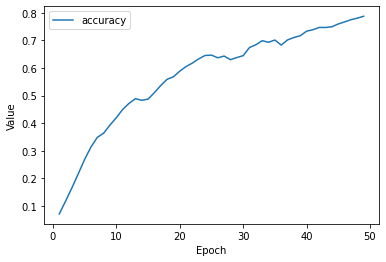

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

## Task 2: Optimize the model

Experiment with the following:

* number of hidden layers 
* number of nodes in each layer
* dropout regularization rate

What trends did you discover?  Can you reach at least 98% accuracy against the test set? 




In [ ]:
#@title Double-click to view some possible answers.

# It would take much too long to experiment 
# fully with topography and dropout regularization 
# rate. In the real world, you would
# also experiment with learning rate, batch size, 
# and number of epochs.  Since you only have a 
# few minutes, searching for trends can be helpful.
# Here is what we discovered:
#   * Adding more nodes (at least until 256 nodes) 
#     to the first hidden layer improved accuracy.
#   * Adding a second hidden layer generally 
#     improved accuracy.
#   * When the model contains a lot of nodes, 
#     the model overfits unless the dropout rate 
#     is at least 0.5. 

# We reached 98% test accuracy with the 
# following configuration:
#   * One hidden layer of 256 nodes; no second hidden layer.
#   * dropout regularization rate of 0.4

# We reached 98.2% test accuracy with the 
# following configuration:
#   * First hidden layer of 256 nodes; 
#     second hidden layer of 128 nodes.
#   * dropout regularization rate of 0.2

# MAT-> 98.34% test accuracy with the 
# following configuration:
#   * First hidden layer of 256 nodes; 
#     2nd, 3rd hidden layer of 256 nodes.
#   * dropout regularization rate of 0.4
